* [Scotland's Aquaculture Map](http://aquaculture.scotland.gov.uk/map/map.aspx)
* [Shellfish results](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish/shellfish-results)
* [Safety and harvesting](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish)

https://twitter.com/FSScotBiotoxins

http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish

http://aquaculture.scotland.gov.uk/data/site_details.aspx

http://aquaculture.scotland.gov.uk/data/shellfish_species_area_classification.aspx

http://aquaculture.scotland.gov.uk/data/phytoplankton_monitoring_samples.aspx

# Atom

To preview markdown in Atom
    
    ctrl-shift-m

# Setup

In [1]:
cd ../../python/projects/

/home/doudlas/git/python/projects


###### Setup

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import datetime
import requests
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Local code imports
python_project_path = os.path.join(
    os.path.expanduser('~')
    , 'git'
    , 'python'
    , 'projects')

if python_project_path not in sys.path:
    sys.path.append(python_project_path)

import water_quality as wq

# Local location where the files original data files were downloaded. 
#data_dir_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# Used to create format string
# And, find a list of files
#phytoplankton_start_str = 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report'
#phytoplankton_start_str = wq.file_start_string['phytoplankton_start_str']
#biotoxin_start_str = 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report'
#biotoxin_start_str = wq.file_start_string['biotoxin_start_str']
#e_coli_start_str = 'Shellfish_-_E._coli_-_Weekly_Result_Report'
#e_coli_start_str = wq.file_start_string['e_coli_start_str']


#(filenames_shellfish_phytoplankton
# , filenames_shellfish_e_coli
# , filenames_shellfish_biotoxin) = wq.run_get_downloaded_shellfish_filenames(
#                                       data_dir_path=data_dir_path
#                                       , phytoplankton_start_str=phytoplankton_start_str
#                                       , e_coli_start_str=e_coli_start_str
#                                       , biotoxin_start_str=biotoxin_start_str)

(filenames_shellfish_phytoplankton
 , filenames_shellfish_e_coli
 , filenames_shellfish_biotoxin) = wq.run_get_downloaded_shellfish_filenames()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Some contents

[#Local-files](#Local-files)

# Download files

http://www.foodstandards.gov.scot/publications-and-research/publications/shellfish-results-week-ending-03-august-2018



http://docs.python-requests.org/en/master/

In [20]:
"""
def create_list_of_filenames(format_string):
    
    my_months = ['January'
             , 'February'
             ,'March'
             , 'April'
             , 'May'
             , 'June'
             , 'July'
             , 'August'
             , 'September'
             , 'October'
             , 'November'
             , 'December'
            ]

    list_of_filenames = []
    
    t = datetime.datetime(year=2018, month=1, day=1)
    for i in range(365):

        day = t.strftime('%d')
        month = my_months[t.month-1]
        year = t.year
        list_of_filenames.append(format_string.format(year, month, day))
        t = t + datetime.timedelta(days=1)
    return list_of_filenames
"""

if False: 
    #list_of_filenames_phytoplankton = create_list_of_filenames('Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xlsx')
    list_of_filenames_phytoplankton = wq.create_list_of_filenames(format_str_phytoplankton)
    #list_of_filenames_e_coli = create_list_of_filenames('Shellfish_-_E._coli_-_Weekly_Result_Report_-_{}_-_{}_{}_.xls')
    list_of_filenames_e_coli = wq.create_list_of_filenames(format_str_e_coli)
    #list_of_filenames_biotoxin = create_list_of_filenames('Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xls')
    list_of_filenames_biotoxin = wq.create_list_of_filenames(format_str_biotoxin)

In [ ]:
#def url(filename):
#    return 'http://www.foodstandards.gov.scot/downloads/' + filename
#
#def filepath(filename):
#    return os.path.join(data_dir_path, filename)
#    
#def filter_out_exiting_filesnames(list_of_filenames):
#    new_filenames = []
#    for filename in list_of_filenames:
#        if os.path.exists(path):
#            continue
#        new_filenames.append(filename)
        
if False:
    list_of_filenames_phytoplankton = filter_out_exiting_filesnames(list_of_filenames_phytoplankton)
    list_of_filenames_e_coli = filter_out_exiting_filesnames(list_of_filenames_e_coli)
    list_of_filenames_biotoxin = filter_out_exiting_filesnames(list_of_filenames_biotoxin)

In [33]:
#list_of_data_files = pd.DataFrame(os.listdir(data_dir_path), columns=['files'])
#list_of_data_files_phytoplankton = list_of_data_files[list_of_data_files.files.str.startswith(phytoplankton_start_str)].copy()
#list_of_data_files_e_coli = list_of_data_files[list_of_data_files.files.str.startswith(e_coli_start_str)].copy()
#list_of_data_files_biotoxin = list_of_data_files[list_of_data_files.files.str.startswith(biotoxin_start_str)].copy()

(list_of_data_files_phytoplankton
        , list_of_data_files_e_coli
        , list_of_data_files_biotoxin) = run_get_list_of_data_files()

In [132]:
#def year(x):
#    return int(x.split('.')[0].split('_')[-4])
#def month(x):
#    my_months_to_int = dict(zip(my_months, range(1,13)))
#    return my_months_to_int[x.split('.')[0].split('_')[-2]]
#def day(x):
#    return int(x.split('.')[0].split('_')[-1])
#
#def to_date(x):
#    return datetime.date(year=year(x), month=month(x), day=day(x))
#
#list_of_data_files_phytoplankton['date'] = list_of_data_files_phytoplankton['files'].apply(to_date)
#list_of_data_files_biotoxin['date'] = list_of_data_files_biotoxin['files'].apply(to_date)

In [133]:
#def year(x):
#    return int(x.split('_')[-5])
#def month(x):
#    my_months_to_int = dict(zip(my_months, range(1,13)))
#    return my_months_to_int[x.split('_')[-3]]
#def day(x):
#    return int(x.split('_')[-2])
#def to_date(x):
#    return datetime.date(year=year(x), month=month(x), day=day(x))
#
# list_of_data_files_e_coli['date'] = list_of_data_files_e_coli['files'].apply(to_date)

In [24]:
# def download_save_from_list(list_of_filenames):
#    
#    def download_save(url, path):
#        
#        r = requests.get(url, stream=True)
#
#        if r.status_code == 200:
#            with open(path, 'wb') as f:
#                f.write(r.content)
#        
#    for filename in list_of_filenames:
#        
#        #url = 'http://www.foodstandards.gov.scot/downloads/' + filename
#        url =  url(filename)
#        path = filepath(filename)
#        #if os.path.exists(path):
#        #    continue
#
#        download_save(url, path)
#
#                print('.', end='')
if False:
    download_save_from_list(list_of_filenames_phytoplankton)
    download_save_from_list(list_of_filenames_e_coli)
    download_save_from_list(list_of_filenames_biotoxin)


IndentationError: unexpected indent (<ipython-input-24-393ac9408d9e>, line 21)

# Local files

## Campbeltown Loch - Shellfish Phytoplankton

[#Setup](#Setup)

###### phytoplankton_metadata

In [13]:
#def create_phytoplankton_metadata():
#
#    header = ['Region'
#         , 'Area'
#         , 'Site'
#         , 'Origin of Sample'
#         , 'NGR'
#         , 'SIN'
#         , 'Sample'
#         , 'Collected'
#         , 'Received'
#         , 'Analyzed'
#         , 'Pseudo-nitzschia'
#         , 'Alexandrium'
#         , 'Dinophysis'
#         , 'prorocentrum_lima'
#         , 'prorocentrum_cordatum'
#         , 'Lingulodinium'
#         , 'Protoceratium']
#
#    header_pyhtoplanktons = header[10:]
#    header_pyhtoplanktons_trig = header[10:-3]
#    header_pyhtoplanktons_no_trig = header[-3:]
#
#    phytoplankton_metadata={'header':header
#                           'header_pyhtoplanktons':header[10:]
#                           'header_pyhtoplanktons_trig':header[10:-3]
#                           'header_pyhtoplanktons_no_trig':header[-3:]
#                           'triggers':[50000, 40, 100, 100]}
#
#    return phytoplankton_metadata


In [11]:
#header = ['Region'
#     , 'Area'
#     , 'Site'
#     , 'Origin of Sample'
#     , 'NGR'
#     , 'SIN'
#     , 'Sample'
#     , 'Collected'
#     , 'Received'
#     , 'Analyzed'
#     , 'Pseudo-nitzschia'
#     , 'Alexandrium'
#     , 'Dinophysis'
#     , 'prorocentrum_lima'
#     , 'prorocentrum_cordatum'
#     , 'Lingulodinium'
#     , 'Protoceratium']

#header_pyhtoplanktons = header[10:]
#header_pyhtoplanktons_trig = header[10:-3]
#header_pyhtoplanktons_no_trig = header[-3:]

#triggers = [50000, 40, 100, 100]

#def read_pyhtoplankton(data_dir_path):
#    
#    pyhtoplankton_list = []
#    for f in filenames_shellfish_phytoplankton:
#
#        phytoplankton_period = pd.read_excel(
#            os.path.join(data_dir_path, f), skiprows=[0, 1, 2, 3], header=None)
#        
#        pyhtoplankton_list.append(phytoplankton_period)
#        
#    return pd.concat(pyhtoplankton_list)

#def preprocess_pyhtoplankton(pyhtoplankton):
    
#    pyhtoplankton.columns = header
#    pyhtoplankton['Region'] = pyhtoplankton.Region.fillna(method='ffill')
#    pyhtoplankton['Collected'] = pd.to_datetime(pyhtoplankton['Collected'])
    
#    return pyhtoplankton

#def select_area(area, pyhtoplankton):

 #   pyhtoplankton_area = pyhtoplankton[pyhtoplankton['Area']==area]
 #   pyhtoplankton_area = pyhtoplankton_area.set_index('Collected')
    
 #   return pyhtoplankton_area


#def list_of_areas(pyhtoplankton):
#    return pyhtoplankton.Area.unique()

#pyhtoplankton_ct = select_area('Campbeltown Loch', pyhtoplankton)


def plot_pyhtoplankton(data, label):
    
    ax = data.plot.barh(y=header_pyhtoplanktons
        , figsize=(10, 50)
        , grid=True
        , logx=True
        , label=False
        , width=2)
    
    ax.legend(loc=0, fontsize=14)
    ax.set_title(label=label, fontsize=20)
    
    return ax

def plot_pyhtoplankton_save(data, label, dst_filepath):
    
    #ax = data.plot.barh(y=header_pyhtoplanktons
    #    , figsize=(10, 50)
    #    , grid=True
    #    , logx=True
    #    , label=False
    #    , width=2)
    
    #ax.legend(loc=0, fontsize=14)
    #ax.set_title(label=label, fontsize=20)
    
    ax = plot_pyhtoplankton(data, label)

    plt.savefig(dst_filepath)

    plt.close()

def _phytoplankton_plot_filepath(area):
    filename = 'phytoplankton_' + area.lower().replace(' ', '_')
    filepath = os.path.join('figs', filename)
    return filepath
    
def get_phytoplankton_plot_filepath(area):
    filepath = _phytoplankton_plot_filepath(area) + '.png'    
    return filepath

def get_phytoplankton_no_trig_plot_filepath(area):
    filepath = _phytoplankton_plot_filepath(area) + '_no_trig.png'   
    return filepath

def get_phytoplankton_trig_plot_filepath(area):
    filepath = _phytoplankton_plot_filepath(area) + '_trig.png'   
    return filepath
    
    
#if False:
#    plot_pyhtoplankton(pyhtoplankton_ct)
    
if False:
    for area in list_of_areas(pyhtoplankton):
        print(area)
        
        dst_filepath = get_phytoplankton_filepath(area)
               
        label = "Phytoplankton\n" + area
        
        dat = select_area(area, pyhtoplankton)
        
        plot_pyhtoplankton_save(data=dat
                           , label=label
                           , dst_filepath=dst_filepath)
 
if True:
    
    pyhtoplankton = read_pyhtoplankton(data_dir_path=data_dir_path)
    pyhtoplankton = preprocess_pyhtoplankton(pyhtoplankton)

    phytoplankton_metadata = pd.DataFrame({'area':list_of_areas(pyhtoplankton)})
    phytoplankton_metadata['plot'] = phytoplankton_metadata['area'].apply(get_phytoplankton_plot_filepath)
    phytoplankton_metadata['plot_trig'] = phytoplankton_metadata['area'].apply(get_phytoplankton_trig_plot_filepath)
    phytoplankton_metadata['plot_no_trig'] = phytoplankton_metadata['area'].apply(get_phytoplankton_no_trig_plot_filepath)

In [14]:
area = list_of_areas(pyhtoplankton)[0]
dst_filepath = get_phytoplankton_plot_filepath(area)

'figs/phytoplankton_campbeltown_loch.png'

In [6]:
pyhtoplankton.head()

,Region,Area,Site,Origin of Sample,NGR,SIN,Sample,Collected,Received,Analyzed,Pseudo-nitzschia,Alexandrium,Dinophysis,prorocentrum_lima,prorocentrum_cordatum,Lingulodinium,Protoceratium
0,Argyll and Bute,Campbeltown Loch,Kildalloig Bay,18.0,NR75061961,AB 029 008 04,13214,2018-03-05 08:40:00,2018-03-06,2018-03-07 09:30:00,260,0,0,0,100,0,0
1,Argyll and Bute,Colonsay,The Strand East,15.0,NR37318979,AB 041 1199 13,13225,2018-03-05 11:30:00,2018-03-07,2018-03-08 09:40:00,260,0,0,0,0,0,0
2,Argyll and Bute,Loch Creran West: Rubha Mor,Rubha Mor,9.0,NM91084173,AB 130 022 13,13213,2018-03-05 09:00:00,2018-03-05,2018-03-06 09:45:00,2760,20,0,0,0,0,0
3,Argyll and Bute,Loch Fyne: Ardkinglas,The Shore,16.0,NN16430992,AB 147 036 13,13234,2018-03-07 09:15:00,2018-03-07,2018-03-08 12:50:00,0,0,0,0,0,0,0
4,Argyll and Bute,Loch Fyne: Otter Ferry,Balliemore,14.0,NR92168351,AB 151 039 13,13236,2018-03-07 08:20:00,2018-03-08,2018-03-09 09:40:00,20,0,0,0,0,0,0


In [9]:
pyhtoplankton.SIN.unique()

array(['AB 029 008 04', 'AB 041 1199 13', 'AB 130 022 13',
       'AB 147 036 13', 'AB 151 039 13', 'AB 205 063 08', 'AB 286 082 13',
       'AB 617 1204 08', 'AB 695 1507 08', 'DG 191 175 12',
       'DG 499 865 16', 'FF 072 188 16', 'HL 114 937 08', 'HL 136 219 08',
       'LH 168 114 08', 'LH 185 120 08', 'LH 187 699 08', 'LH 203 127 08',
       'LH 249 129 04', 'RC 090 1616 08', 'RC 625 1233 13',
       'SA 337 719 16', 'SI 037 415 08', 'SI 050 420 08', 'SI 080 424 08',
       'SI 232 438 08', 'SI 242 443 08', 'SI 288 455 08', 'SI 297 469 08',
       'SI 321 462 08', 'SI 324 399 08', 'SI 326 733 08', 'SI 327 410 08',
       'SI 797 2083 08', 'SL 137 281 08', 'SL 159 286 13',
       'UB 282 165 04', 'AB 200 1915 08', 'HS 103 303 13',
       'HS 157 310 08', 'HS 167 320 08', 'AB 200 059 08', 'LH 057 106 08',
       'AB 178 051 08', 'AB 202 059 08'], dtype=object)

In [23]:
phytoplankton_metadata.head()

,area,plot,plot_trig,plot_no_trig
0,Campbeltown Loch,figs/phytoplankton_campbeltown_loch.png,figs/phytoplankton_campbeltown_loch_trig.png,figs/phytoplankton_campbeltown_loch_no_trig.png
1,Colonsay,figs/phytoplankton_colonsay.png,figs/phytoplankton_colonsay_trig.png,figs/phytoplankton_colonsay_no_trig.png
2,Loch Creran West: Rubha Mor,figs/phytoplankton_loch_creran_west:_rubha_mor...,figs/phytoplankton_loch_creran_west:_rubha_mor...,figs/phytoplankton_loch_creran_west:_rubha_mor...
3,Loch Fyne: Ardkinglas,figs/phytoplankton_loch_fyne:_ardkinglas.png,figs/phytoplankton_loch_fyne:_ardkinglas_trig.png,figs/phytoplankton_loch_fyne:_ardkinglas_no_tr...
4,Loch Fyne: Otter Ferry,figs/phytoplankton_loch_fyne:_otter_ferry.png,figs/phytoplankton_loch_fyne:_otter_ferry_trig...,figs/phytoplankton_loch_fyne:_otter_ferry_no_t...


In [26]:
def plot_pyhtoplankton_no_trig(pyhtoplankton, header_pyhtoplanktons_no_trig):
    pyhtoplankton_no_trig = pyhtoplankton[header_pyhtoplanktons_no_trig]

    ax = pyhtoplankton_no_trig.plot.barh(figsize=(10, 40)
                                         , grid=True
                                         , logx=True
                                         , ylim=(1, 1000)
                                        , width=2)  

    ax.set_title(label="Phytoplankton\nno trigger", fontsize=20)

    plt.savefig('phytoplankton_no_trig.png')
    plt.close()


if False:
    plot_pyhtoplankton_no_trig(pyhtoplankton_ct, header_pyhtoplanktons_no_trig)

In [28]:
if False:
    def plot_pyhtoplankton_trig(pyhtoplankton, header_pyhtoplanktons_trig):
        pyhtoplankton_ct_trig = pyhtoplankton[header_pyhtoplanktons_trig]
        pyhtoplankton_ct_trig_norm = pyhtoplankton_ct_trig / triggers

        ax  = pyhtoplankton_ct_trig_norm.plot.barh(figsize=(10, 50)
                                        , grid=True
                                        , fontsize=10
                                        , width=2)

        ax.set_title(label="Phytoplankton\nscaled by trigger", fontsize=10)
        ax.legend(fontsize=10, loc=0)

        plt.savefig('phytoplankton_trig.png')
        plt.close()

    plot_pyhtoplankton_trig(pyhtoplankton_ct, header_pyhtoplanktons_trig)

# E. Coli

###### General

1. Files should be CSV
1. Files should always be in an *open* format.
1. The data should be easy to find and read using a machine.
1. If they are to be in a binary format then the data should have been derived from another easily readable formt.
1. The data should be contiguous.
1. 'Ecoli/100g' <18 is not useful as a number.
 * Anyway the other numbers are rounded

###### Manual 
* The files are currently in a old unsupported `xls` format.
* `Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_25_.xls`
 * First row removed.
* `Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_March_30_.xls`
 * Front page
 * Handled using `sheet_name='Report'` 
* Columns changing eg. `Additional Info` sometimes appearing in middle of `Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_January_19_.xls`
 * If additoinal column must be added then it should be to the end and then never removed.

Draft of email

Make each of these a sparate file.

Dear

1. Is there file with all accumulated E.Coli data. Or are there only separate weekly `.xls` files?
1. To make the data accessable, it would be better to have the data in an open format, preferrably `.csv`. Who is in charge of the open data effot?
1. The current weekly E.Coli reports are in a old, unsupported, closed, binary excel format. This must be rectified going forward. 
1. There is an additional *front page* in the E. Coli report.
1. The columns are inconsistent. This makes ... almost impossible. Generally, if additional columns must be added, then they must be appended to the furthest right. If a column is not to be used then it should still not be deleted. Alternatively a metadata file that can be processed and explains the changes. Changes to the column format that will break ... should be done with care and appear in the metadata. A quick sloution might be indicated in the file name. 
1. Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_25_.xls' has an extra row before the header

In [9]:
#def get_header(filepath):
#
#    return pd.read_excel(filepath, sheet_name='Report').columns.values

#def read_e_coli(file_dir, file_name):
#    file_path = os.path.join(file_dir, file_name)
#    
#    if file_name == 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_25_.xls': 
#        dat_df = pd.read_excel(file_path, sheet_name='Report', skiprows=[0])
#    else:
#        dat_df = pd.read_excel(file_path, sheet_name='Report')
#        
#    dat_df = dat_df[['Ecoli/100g', 'Collection Date', 'Production Area']]   
#    dat_df['Collection Date'] = pd.to_datetime(dat_df['Collection Date'])
#    dat_df = dat_df.set_index('Collection Date')
#    dat_df['Ecoli/100g'] = dat_df['Ecoli/100g'].astype(str).str.strip('<').str.strip('>').astype('float')
#
#    return dat_df

#def read_e_coli_as_df():
#    e_coli_list = []
#    for f in filenames_shellfish_e_coli:
#        df = read_e_coli(file_dir=data_dir_path, file_name=f)   
#        e_coli_list.append(df)
#    return pd.concat(e_coli_list)

#def e_coli_select_area(e_coli):
#    return e_coli[e_coli['Production Area'] == 'Loch na Cille']


#def create_e_coli_fig_file_path(str_):
#    fn = 'e_coli_' + str_.lower().replace(' ', '_') + '.png'
#    e_coli_fig_file_path = os.path.join('figs', fn)
#    return e_coli_fig_file_path
   


if False:

    for a in e_coli.index.levels[0]:
        e_coli.loc[a].plot(figsize=(20, 10), logy="True", title=a, grid=True)
        #fn = 'e_coli_' + a.lower().replace(' ', '_') + '.png'
        #plt.savefig(os.path.join('figs', fn))
        plt.savefig(create_e_coli_fig_file_path(a))
        plt.close() 
    
if True:    
    e_coli = read_e_coli_as_df()

# e_coli_ct = e_coli_select_area(read_e_coli_as_df())



In [10]:
e_coli_metadata = pd.DataFrame()
e_coli_metadata['area'] = e_coli['Production Area'].unique()
e_coli_metadata['fig_path'] = e_coli_metadata['area'].apply(create_e_coli_fig_file_path)


In [85]:
e_coli_metadata

,area,fig_path
0,Loch A Chumhainn: Inner Deep Site,figs/e_coli_loch_a_chumhainn:_inner_deep_site.png
1,Loch A Chumhainn: Outer,figs/e_coli_loch_a_chumhainn:_outer.png
2,Castle Stalker,figs/e_coli_castle_stalker.png
3,Loch Roag - Gob Sgrithir,figs/e_coli_loch_roag_-_gob_sgrithir.png
4,Garbh Lingeigh,figs/e_coli_garbh_lingeigh.png
5,Loch Eil,figs/e_coli_loch_eil.png
6,Loch Eil: Fassfern,figs/e_coli_loch_eil:_fassfern.png
7,Loch Sunart,figs/e_coli_loch_sunart.png
8,Loch Beag,figs/e_coli_loch_beag.png
9,Loch Leven: Lower,figs/e_coli_loch_leven:_lower.png


In [27]:
e_coli = e_coli.reset_index().set_index(['Production Area', 'Collection Date']).sort_index()#.plot(figsize=(20, 10))#, append=True)

In [24]:
#e_coli = e_coli.reset_index('Production Area')

In [2]:
mkdir figs

# Markdown file

In [1]:
pwd

'/home/doudlas/git/python/notebooks'

In [24]:
# Generatng markdown

# pandoc --from gfm --to html --output water_quality.html  water_quality.md 

# Using e_coli_metadata instead.

#ecoli_figs = [
#    filename 
#    for filename 
#    in os.listdir('figs') 
#    if filename.startswith('e_coli')]

In [11]:
def get_link(str_):
    return str_.lower().replace(' ', '-').replace(':', '')

with open('water_quality.md', 'w') as file_handle:

    print('# Contents', file=file_handle)
    
    print('## Phytoplankton', file=file_handle)
    for key, row in phytoplankton_metadata.iterrows():
        print('* [{}](#{})'.format(row.area, get_link(row.area)), file=file_handle)
    
    print('## E. Coli', file=file_handle)    
    for key, row in e_coli_metadata.iterrows():        
        print('* [{}](#{})'.format(row.area, get_link(row.area)), file=file_handle)
       
            
    print('# Phytoplankton', file=file_handle)
    
    for key, row in phytoplankton_metadata.iterrows():
        print('## ' + row.area, file=file_handle)
        print('![]({})'.format(row['plot']), file=file_handle)

    print('# E. Coli', file=file_handle)
    for key, row in e_coli_metadata.iterrows():
        print('## ' + row.area, file=file_handle)
        print('![]({})'.format(row['fig_path']), file=file_handle)
    

In [12]:
!pandoc --from gfm --to html --output water_quality.html  water_quality.md 

In [86]:
e_coli_metadata

,area,fig_path
0,Loch A Chumhainn: Inner Deep Site,figs/e_coli_loch_a_chumhainn:_inner_deep_site.png
1,Loch A Chumhainn: Outer,figs/e_coli_loch_a_chumhainn:_outer.png
2,Castle Stalker,figs/e_coli_castle_stalker.png
3,Loch Roag - Gob Sgrithir,figs/e_coli_loch_roag_-_gob_sgrithir.png
4,Garbh Lingeigh,figs/e_coli_garbh_lingeigh.png
5,Loch Eil,figs/e_coli_loch_eil.png
6,Loch Eil: Fassfern,figs/e_coli_loch_eil:_fassfern.png
7,Loch Sunart,figs/e_coli_loch_sunart.png
8,Loch Beag,figs/e_coli_loch_beag.png
9,Loch Leven: Lower,figs/e_coli_loch_leven:_lower.png


In [40]:
phytoplankton_metadata

,area,plot,plot_trig,plot_no_trig
0,Campbeltown Loch,figs/phytoplankton_campbeltown_loch.png,figs/phytoplankton_campbeltown_loch_trig.png,figs/phytoplankton_campbeltown_loch_no_trig.png
1,Colonsay,figs/phytoplankton_colonsay.png,figs/phytoplankton_colonsay_trig.png,figs/phytoplankton_colonsay_no_trig.png
2,Loch Creran West: Rubha Mor,figs/phytoplankton_loch_creran_west:_rubha_mor...,figs/phytoplankton_loch_creran_west:_rubha_mor...,figs/phytoplankton_loch_creran_west:_rubha_mor...
3,Loch Fyne: Ardkinglas,figs/phytoplankton_loch_fyne:_ardkinglas.png,figs/phytoplankton_loch_fyne:_ardkinglas_trig.png,figs/phytoplankton_loch_fyne:_ardkinglas_no_tr...
4,Loch Fyne: Otter Ferry,figs/phytoplankton_loch_fyne:_otter_ferry.png,figs/phytoplankton_loch_fyne:_otter_ferry_trig...,figs/phytoplankton_loch_fyne:_otter_ferry_no_t...
5,Loch Striven,figs/phytoplankton_loch_striven.png,figs/phytoplankton_loch_striven_trig.png,figs/phytoplankton_loch_striven_no_trig.png
6,Ulva: Loch Na Keal West,figs/phytoplankton_ulva:_loch_na_keal_west.png,figs/phytoplankton_ulva:_loch_na_keal_west_tri...,figs/phytoplankton_ulva:_loch_na_keal_west_no_...
7,Loch na Cille,figs/phytoplankton_loch_na_cille.png,figs/phytoplankton_loch_na_cille_trig.png,figs/phytoplankton_loch_na_cille_no_trig.png
8,Kilfinichen Bay,figs/phytoplankton_kilfinichen_bay.png,figs/phytoplankton_kilfinichen_bay_trig.png,figs/phytoplankton_kilfinichen_bay_no_trig.png
9,Loch Ryan,figs/phytoplankton_loch_ryan.png,figs/phytoplankton_loch_ryan_trig.png,figs/phytoplankton_loch_ryan_no_trig.png


In [3]:
mv *.png figs/

In [6]:
e_coli_ct

,Ecoli/100g,Production Area
Collection Date,,
2018-06-12,16000.0,Loch na Cille
2018-08-13,1700.0,Loch na Cille
2018-03-19,18.0,Loch na Cille
2018-04-18,9200.0,Loch na Cille
2018-02-19,270.0,Loch na Cille
2018-07-17,16000.0,Loch na Cille


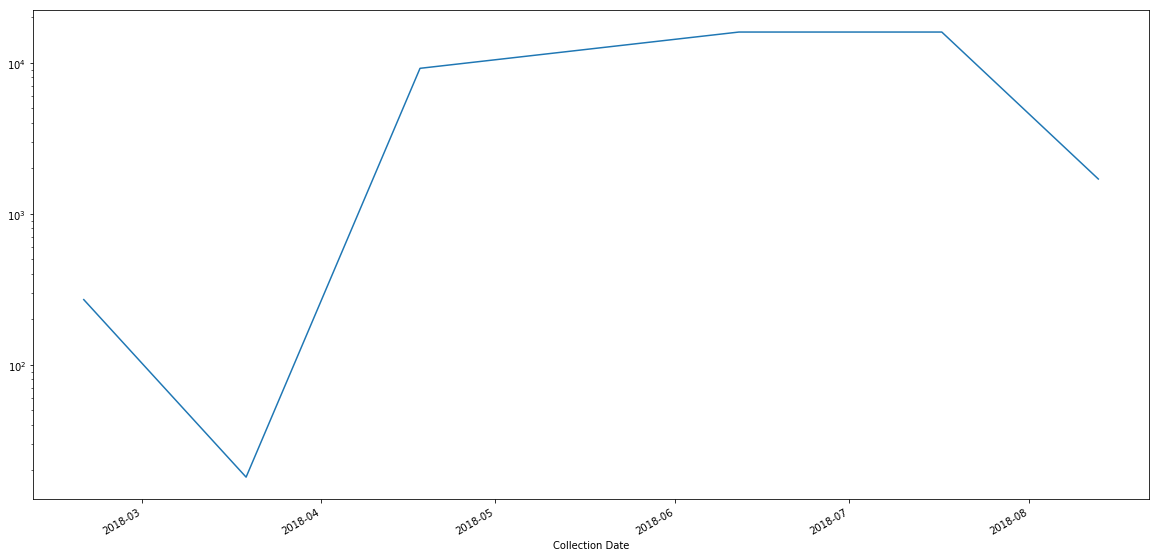

In [8]:
e_coli_ct['Ecoli/100g'].plot(figsize=(20, 10), logy="True")

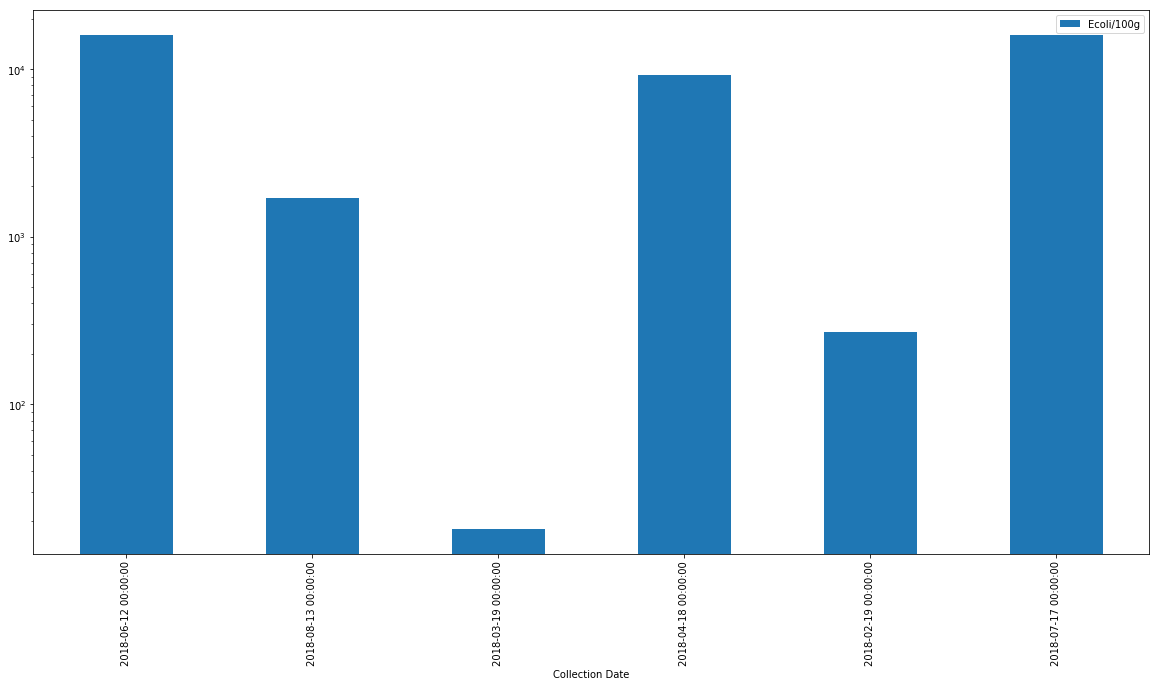

In [15]:
e_coli_ct.plot.bar(y=['Ecoli/100g'], figsize=(20, 10), logy=True)

In [10]:
e_coli_ct['Ecoli/100g']

Collection Date
2018-06-12    16000.0
2018-08-13     1700.0
2018-03-19       18.0
2018-04-18     9200.0
2018-02-19      270.0
2018-07-17    16000.0
Name: Ecoli/100g, dtype: float64

In [12]:
e_coli_ct.columns

Index(['Ecoli/100g', 'Production Area'], dtype='object')

In [16]:
e_coli_ct.iloc[0]

Ecoli/100g                 16000
Production Area    Loch na Cille
Name: 2018-06-12 00:00:00, dtype: object

# Biotoxin

[Biotoxins are substances which are both toxic and have a biological origin. ](http://www.biosciences-labs.bham.ac.uk/exhibit/whatare.html)

In [18]:
def read_biotoxin_():
    biotoxin_list = []
    for f in filenames_shellfish_biotoxin:
        biotoxin_list.append(pd.read_excel(os.path.join(data_dir_path, f)))
    return pd.concat(biotoxin_list, sort=True)

def read_biotoxin():
    biotoxin = read_biotoxin_()
    biotoxin['Date Collected'] = pd.to_datetime(biotoxin['Date Collected']) 
    biotoxin = biotoxin.set_index('Date Collected')
    #biotoxin = biotoxin.fillna(0)
    return biotoxin

biotoxin = read_biotoxin()

def biotoxin_select_area(biotoxin, area):

    biotoxin_ct = biotoxin[biotoxin['Production Area'] == area]
    biotoxin_ct = biotoxin_ct.sort_index()
    
    return biotoxin_ct
    
biotoxin_ct = biotoxin_select_area(biotoxin, 'Loch na Cille')

In [19]:
biotoxin_ct['Species']

Date Collected
2017-12-04    Common mussels
2018-01-04    Common mussels
2018-01-04    Common mussels
2018-01-04    Common mussels
2018-02-05    Common mussels
2018-02-05    Common mussels
2018-02-05    Common mussels
2018-03-06    Common mussels
2018-03-06    Common mussels
2018-03-06    Common mussels
2018-03-06    Common mussels
2018-03-26    Common mussels
2018-03-26    Common mussels
2018-03-26    Common mussels
2018-03-26    Common mussels
2018-04-03    Common mussels
2018-04-03    Common mussels
2018-04-03    Common mussels
2018-04-03    Common mussels
2018-04-18    Common mussels
2018-04-18    Common mussels
2018-04-18    Common mussels
2018-04-23    Common mussels
2018-04-23    Common mussels
2018-04-23    Common mussels
2018-05-09    Common mussels
2018-05-09    Common mussels
2018-05-09    Common mussels
2018-05-09    Common mussels
2018-05-16    Common mussels
                   ...      
2018-06-20    Common mussels
2018-06-20    Common mussels
2018-06-20    Common mussels

In [14]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400']

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [15]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Quant_highvalue_result']

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [16]:
biotoxin_ct.iloc[:, 8]

Date Collected
2018-06-27    Common mussels
2018-07-02    Common mussels
2018-07-11    Common mussels
2018-07-11    Common mussels
2018-07-17    Common mussels
2018-07-17    Common mussels
2018-07-22    Common mussels
2018-07-30    Common mussels
Name: Species, dtype: object

In [17]:
biotoxin_ct.iloc[:, 9]

Date Collected
2018-06-27    Detected
2018-07-02          ND
2018-07-11    Detected
2018-07-11    Detected
2018-07-17         NaN
2018-07-17         NaN
2018-07-22         NaN
2018-07-30    Detected
Name: PSPScreenbyHPLC_ND-DETECTED, dtype: object

In [18]:
biotoxin_ct.iloc[:, 10]

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [19]:
biotoxin_ct.iloc[:, 12]

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [20]:
biotoxin_ct.iloc[:, 14]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: PSP_by_MBA_(µg STXeq/kg), dtype: float64

In [53]:
biotoxin_ct.iloc[:, 16]

Date Collected
2017-12-04     NaN
2018-01-04     NaN
2018-01-04     NaN
2018-01-04     NaN
2018-02-05     NaN
2018-02-05     NaN
2018-02-05     NaN
2018-03-06     NaN
2018-03-06     NaN
2018-03-06     NaN
2018-03-06     NaN
2018-03-26     NaN
2018-03-26     NaN
2018-03-26     NaN
2018-03-26     NaN
2018-04-03    <400
2018-04-03    <400
2018-04-03    <400
2018-04-03    <400
2018-04-18     NaN
2018-04-18     NaN
2018-04-18     NaN
2018-04-23     NaN
2018-04-23     NaN
2018-04-23     NaN
2018-05-09    <400
2018-05-09    <400
2018-05-09    <400
2018-05-09    <400
2018-05-16    <400
              ... 
2018-06-20    <400
2018-06-20    <400
2018-06-20    <400
2018-06-20    <400
2018-06-27    <400
2018-06-27    <400
2018-06-27    <400
2018-06-27    <400
2018-07-02     NaN
2018-07-02     NaN
2018-07-02     NaN
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     N

In [20]:
pd.DataFrame(biotoxin_ct.iloc[:, 16]).plot.bar(figsize=(20, 10), grid=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [23]:
biotoxin_ct.iloc[:, 17]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    <RL
2018-07-17    <RL
2018-07-22    <RL
2018-07-30    <RL
Name: Total AZAs (µg AZA1 eq/kg) - HIGH value result, dtype: object

In [24]:
biotoxin_ct.iloc[:, 18]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    0.1
2018-07-11    0.1
2018-07-17      1
2018-07-17      1
2018-07-22    0.2
2018-07-30    0.3
Name: Total YTXs (mg YTX eq/kg) - HIGH value result, dtype: object

In [25]:
biotoxin_ct.iloc[:, 20]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: DSP BY MBA_NG-PS, dtype: float64

In [26]:
biotoxin_ct.iloc[:, 22]

Date Collected
2018-06-27     NaN
2018-07-02    <LOQ
2018-07-11     NaN
2018-07-11     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <LOQ
Name: ASP\n(mg /kg) , dtype: object

# Map

http://geo.holoviews.org/Working_with_Bokeh.html

https://scipython.com/book/chapter-2-the-core-python-language-i/additional-problems/converting-between-an-os-grid-reference-and-longitudelatitude/

https://stackoverflow.com/questions/39117276/python-to-convert-map-reference-to-latitude-longitude

http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

In [7]:
# http://geo.holoviews.org/Working_with_Bokeh.html

import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

hv.notebook_extension('bokeh')

AttributeError: module 'numpy' has no attribute '__version__'

In [47]:
import selenium

In [50]:
selenium

<module 'selenium' from '/home/doudlas/miniconda3/lib/python3.6/site-packages/selenium/__init__.py'>

In [52]:
help()


Welcome to Python 3.6's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the Internet at https://docs.python.org/3.6/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".

help> selenium
Help on package selenium:

NAME
    selenium

DESCRIPTION
    # Licensed to the Software Freedom Conservancy (SFC) under one
    # or more contributor license agreements.  See the NOTICE file
    # distributed with this work for additional information
    # regarding copyright ownership.  The SFC licenses this file
    # t

In [53]:
ls 

figs/  water_quality_develop.ipynb  water_quality_scotland.ipynb


In [65]:
ls ../../../miniconda3/lib/python3.6/site-packages/selenium/webdriver/chrome/

__init__.py   options.py            service.py
__pycache__/  remote_connection.py  webdriver.py
